In [1]:
import torch
import os
from resolve.helpers import DataGeneration
from resolve.helpers import UMAPAnalyzer
import yaml
import numpy as np


python(46656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
# Set the path to the yaml settings file here
path_to_settings = "./legend/"
with open(f"{path_to_settings}/settings.yaml", "r") as f:
    config_file = yaml.safe_load(f)

torch.manual_seed(0)
version = config_file["path_settings"]["version"]
path_out = f'{config_file["path_settings"]["path_out_model"]}/model-{version}'

In [3]:
# load data:
config_file["model_settings"]["train"]["dataset"]["train_ratio"]=1.
config_file["model_settings"]["train"]["dataset"]["val_ratio"]=0.
config_file["model_settings"]["train"]["dataset"]["test_ratio"]=0.

dataset_train = DataGeneration(mode = "train", 
                                config_file=config_file
                                )

dataset_train.set_dataset(shuffle=False)

if config_file["model_settings"]["train"]["dataset"]["use_feature_normalization"] == "zscore":
    print("theta mean: ", dataset_train.dataset._normalizer._get_scaler("theta").mean_)
    print("phi mean: ", dataset_train.dataset._normalizer._get_scaler("phi").mean_)
elif config_file["model_settings"]["train"]["dataset"]["use_feature_normalization"] == "minmax":
    print("theta mean: ", dataset_train.dataset._normalizer._get_scaler("theta").data_range_)
    print("phi mean: ", dataset_train.dataset._normalizer._get_scaler("phi").data_range_)



(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9) (40000, 5) (40000, 1)
(40000, 9)

In [13]:
loader = dataset_train.set_loader(mode="train", shuffle=False)
batches =np.arange(20)
#batches = [10]
umap = UMAPAnalyzer(batches = batches)
umap.extract_features(loader)

python(46846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


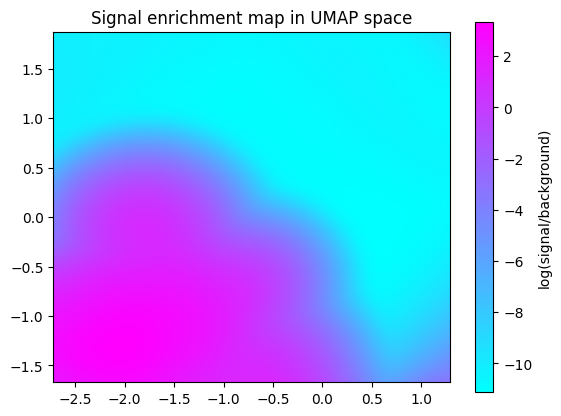

In [14]:
umap.log_signal_over_background_kde(embeddings="local")

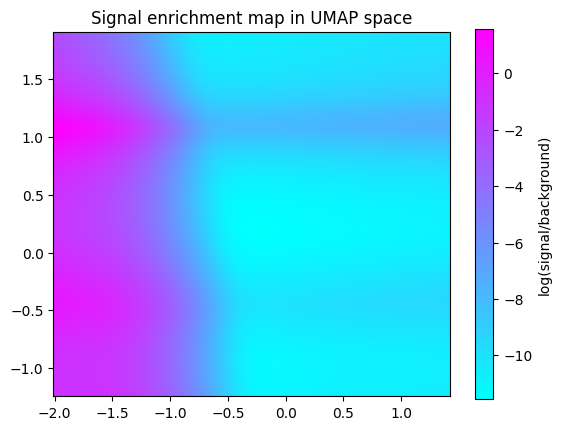

In [15]:
umap.log_signal_over_background_kde(embeddings="global")

/Users/aschuetz/Software/miniconda3/envs/resolve-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_epochs=120, n_jobs=1, n_neighbors=30, random_state=42, verbose=True)
Tue Oct 28 15:38:07 2025 Construct fuzzy simplicial set
Tue Oct 28 15:38:07 2025 Finding Nearest Neighbors
Tue Oct 28 15:38:07 2025 Building RP forest with 27 trees
Tue Oct 28 15:38:08 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Tue Oct 28 15:38:19 2025 Finished Nearest Neighbor Search
Tue Oct 28 15:38:19 2025 Construct embedding


Epochs completed:   0%|            0/120 [00:00]

	completed  0  /  120 epochs
	completed  12  /  120 epochs
	completed  24  /  120 epochs
	completed  36  /  120 epochs
	completed  48  /  120 epochs
	completed  60  /  120 epochs
	completed  72  /  120 epochs
	completed  84  /  120 epochs
	completed  96  /  120 epochs
	completed  108  /  120 epochs
Tue Oct 28 15:39:13 2025 Finished embedding


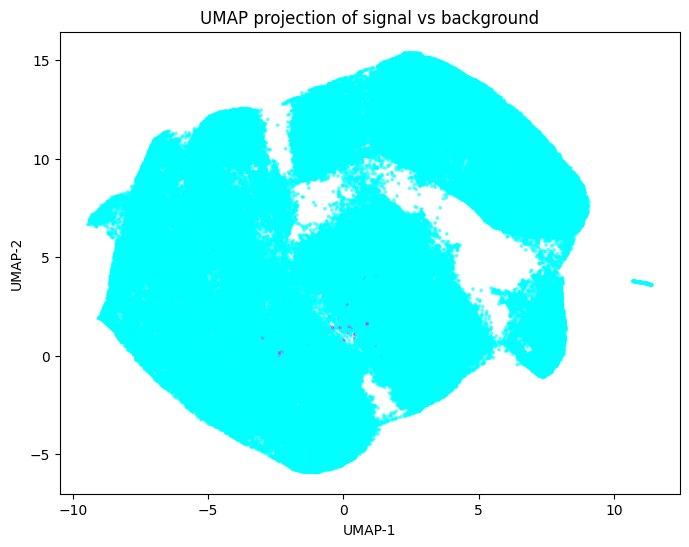

In [16]:
umap.fit_umap("local")
umap.plot()

In [17]:
#umap.fit_umap("global")
#umap.plot()

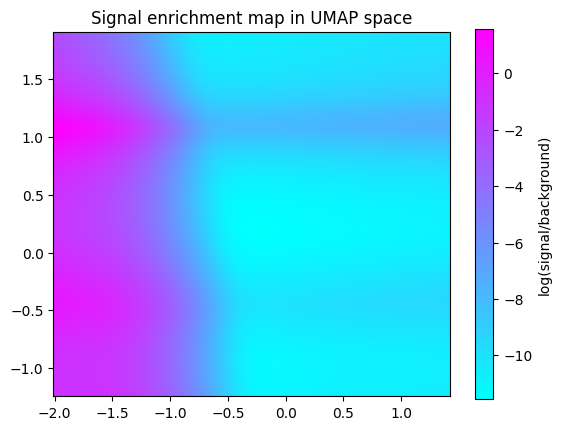

In [18]:
umap.log_signal_over_background_kde(embeddings="global")

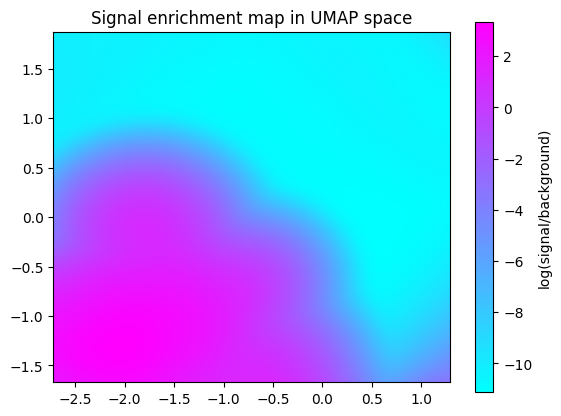

In [19]:
umap.log_signal_over_background_kde(embeddings="local")

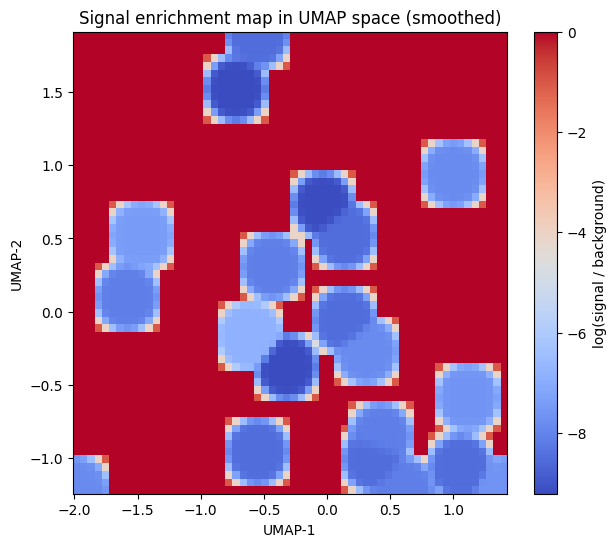

In [20]:
umap.log_signal_over_background_filtered()

python(46920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


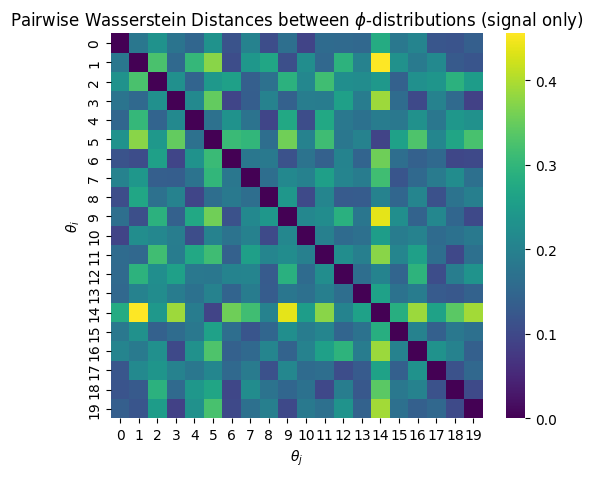

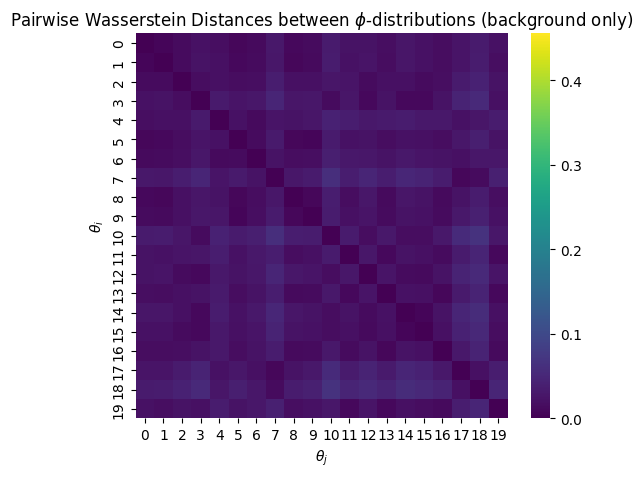

In [21]:

umap.pairwise_wasserstein_distance(loader)